# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [56]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt

In [4]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [5]:
len(data.index)

4870

In [6]:
# number of callbacks for black-sounding names
np.mean(data[data.race=='b'].call)

0.0644763857126236

In [15]:
df=data.copy()

# Question 1

In [57]:
stat, p = shapiro(df['call'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.301, p=0.000


#### Null hypothesis rejected?

# Question 2

#### Null Hypothesis is that your name has no effect on you getting an interview call
#### Alternate hypothesis is that white sounding name does increase your chances of getting an interview call

In [52]:
w = data[data.race=='w']
b = data[data.race=='b']

# Question 3

## Bootstrap Method

In [31]:
current_diff_means=np.mean(data[data.race=='w'].call)-np.mean(data[data.race=='b'].call)
print(current_diff_means)

0.03203285485506058


In [47]:
def calc_n_bootstrap_mean_diff(df, n):
    diffs=[]
    for i in range(n):
        df['race'] = df['race'].sample(frac=1).reset_index(drop=True)
        diff_means=np.mean(df[df.race=='w'].call)-np.mean(df[df.race=='b'].call)
        diffs.append(diff_means)
    return np.array(diffs)

In [48]:
diffs=calc_n_bootstrap_mean_diff(df,1000)

(array([   6.,   34.,   75.,  177.,  214.,  195.,  181.,   78.,   27.,   13.]),
 array([-0.02211048, -0.01775729, -0.01340411, -0.00905093, -0.00469774,
        -0.00034456,  0.00400862,  0.00836181,  0.01271499,  0.01706817,
         0.02142136]),
 <a list of 10 Patch objects>)

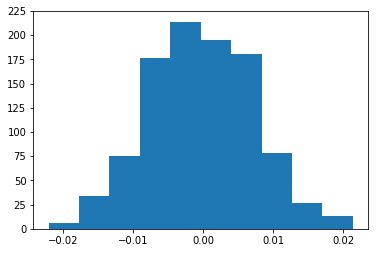

In [49]:
plt.hist(diffs)

In [51]:
len(diffs[diffs<=current_diff_means])/len(diffs)

1.0

#### All bootstrap samples have difference in means less than the observed difference. That means the observed difference is abnormal and so names do have an effect on the number of calls

## Frequentist Method

In [55]:
stats.ttest_ind(w.call,b.call)

Ttest_indResult(statistic=4.1147052908617514, pvalue=3.9408021031288859e-05)

#### P value is very small so we reject the hypothesis that average calls are same for both white and black sounding names

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

<p>
    The analysis presented here means that names have a statistically significant effect on the number of interview calls. This however does not mean that names are the most important factor. We have not considered or compared the other factors. Our analysis is just based on names. 
</p>
<p>
    To say which factor is the most important we would have to do the same kind of analysis for all the factors present in the dataframe and the factor with the lowest p value would be the most significant.
</p>